521H0213 - Đặng Thành Đạt

521H0333 - Trần Đình Quang Vinh

521H0399 - Nguyễn Song Hưng

In [97]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.model_selection import GridSearchCV
from sklearn import svm # for Support Vector Machine

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')


# Processing Data

In [98]:
data=pd.read_csv('car_price_prediction.csv')
data.head()


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [99]:
data.shape


(19237, 18)

In [100]:
data.describe()


,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [101]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [102]:
#Check Duplication
data.duplicated().sum()

313

In [103]:
#Drop duplicate values
data.drop_duplicates(inplace= True)

In [104]:
# check Missing value
data.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [105]:
#Check the number of unique values of each column
data.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [106]:
# Check statistic of dataset
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,2010.914236,4.580216,6.568379
std,9.375468e+05,1.921356e+05,5.665749,1.200223,4.322323
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569501e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577191e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580174e+07,2.206300e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [107]:
data=data.drop(['ID','Doors'],axis=1)

In [108]:
data['Price'] = data['Price'].astype('float64')

In [109]:
# Replacing '-' with 0
data['Levy']=data['Levy'].replace('-','0')

# Converting Levy type to float
data['Levy'] = data['Levy'].astype('float64')

In [110]:
dtime = dt.datetime.now()
data['Age']=dtime.year - data['Prod. year']

In [111]:
data = data.drop('Prod. year',axis=1)


In [112]:
data.head()


,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328.0,1399.0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621.0,1018.0,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467.0,0.0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607.0,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726.0,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,10


In [113]:
# Replacing 'Km' with ''
data['Mileage'] =data['Mileage'].str.replace('km',"")

# Converting Mileage type to int64
data.Mileage = data.Mileage.astype('Int64')

In [114]:
data.Mileage.head()


0    186005
1    192000
2    200000
3    168966
4     91901
Name: Mileage, dtype: Int64

In [115]:
# Replacing 'Turbo' with ''
data['Engine volume'] = data['Engine volume'].str.replace('Turbo','')

# Converting Levy type to float
data['Engine volume'] = data['Engine volume'].astype('float64')

In [116]:
data['Engine volume'].unique()


array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [117]:
data.head()


,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328.0,1399.0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621.0,1018.0,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467.0,0.0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607.0,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726.0,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,10


In [118]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  float64
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Mileage           18924 non-null  Int64  
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Age               18924 non-null  int64  
dtypes: Int64(1), float64(4), int64(2), objec

# Analysis & Visualiation

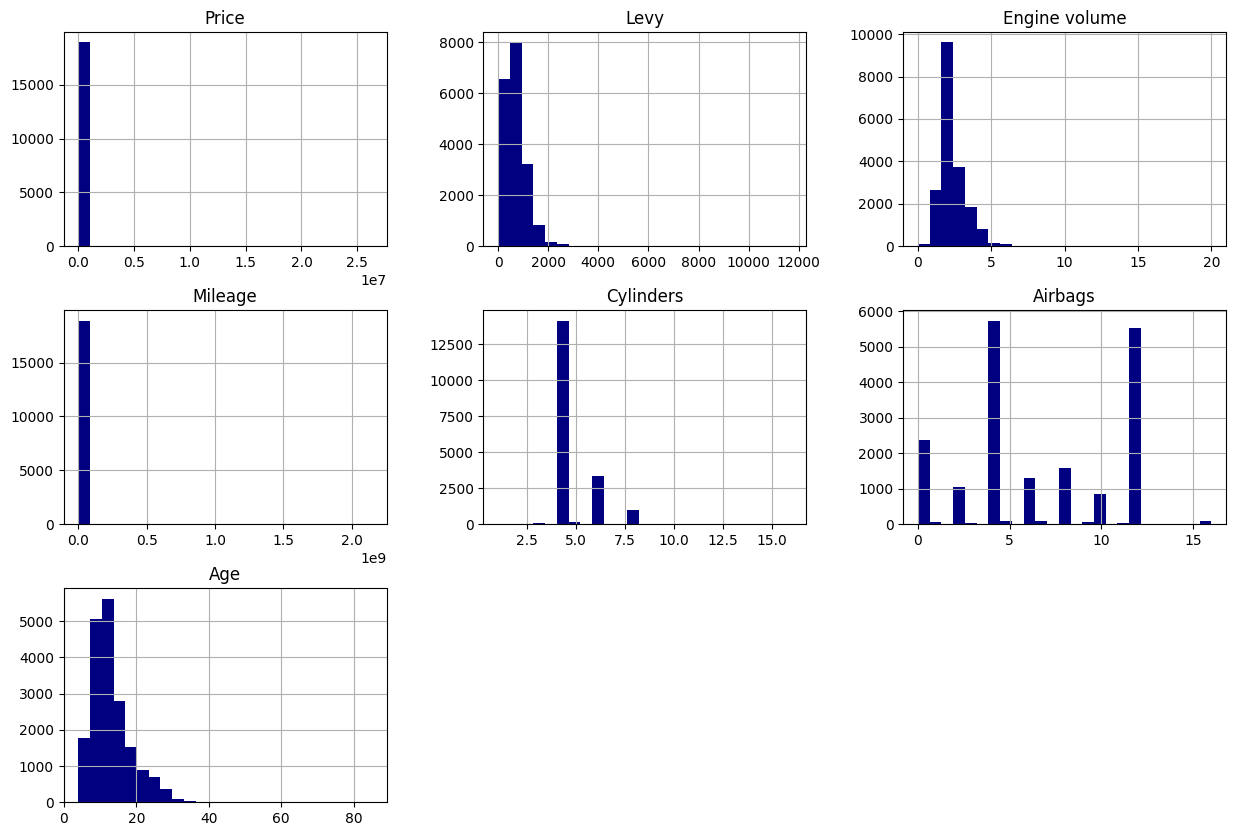

In [119]:
data.hist(bins=25,figsize=(15,10),color='navy')
plt.show()

1- in Levy column: Most values between more than 0 and less than 2000

2- Most Engine valume in range (1 to 5)

3- Mileage for most cars are 0.0 (most cars are new)

4- in Airbags column: Most cars have 3 to 5 airbags or 13 airbags

5- in Age column: Most cars are 13 years old, but we have some very old cars

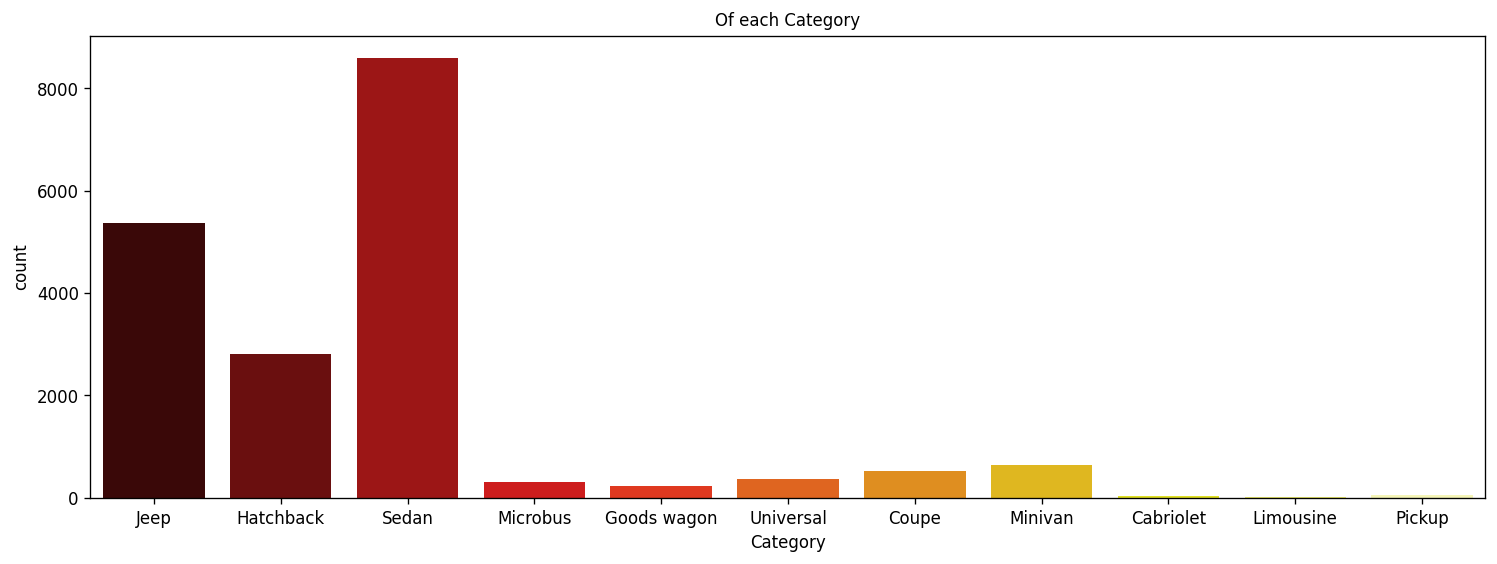

In [120]:
plt.subplots(figsize=(15,5), dpi=120)
sns.countplot(data= data, x='Category',palette='hot')
plt.title("Of each Category",fontsize=10)
plt.show()


Most types of Categories are Sedan, Hatchback, and Jeep.

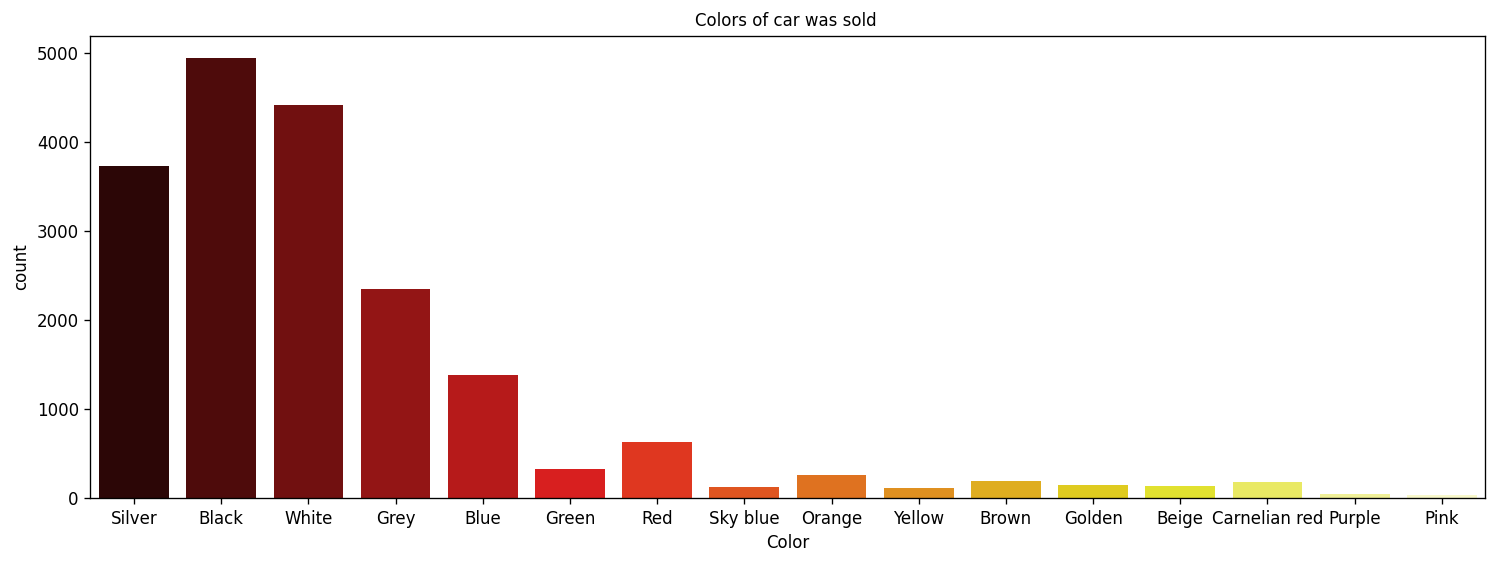

In [121]:
plt.subplots(figsize=(15,5), dpi=120)
sns.countplot(data= data, x='Color',palette='hot')
plt.title("Colors of car was sold ",fontsize=10)
plt.show()

The most sold car colors are Black, Silver,White and Grey.

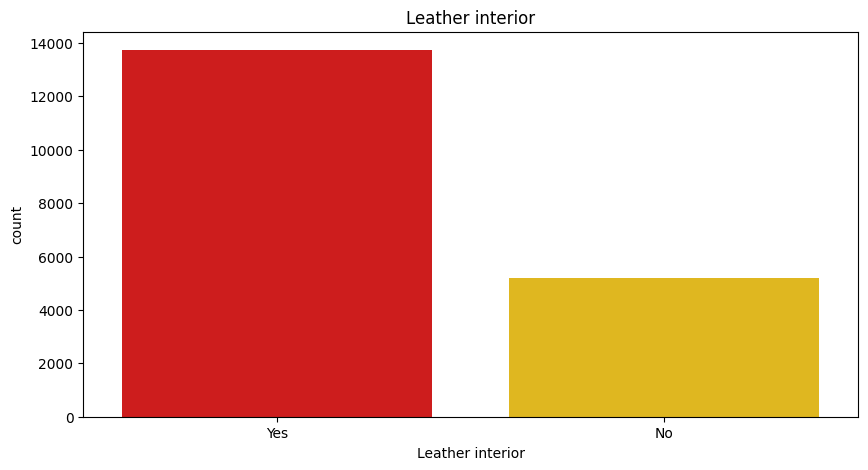

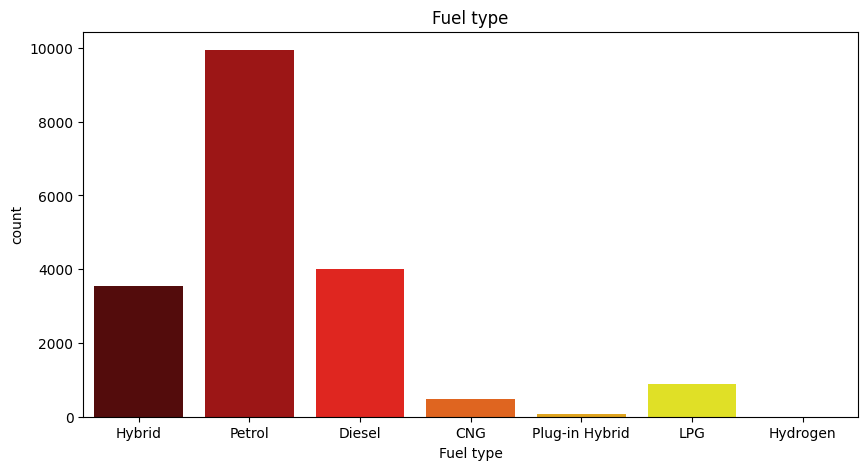

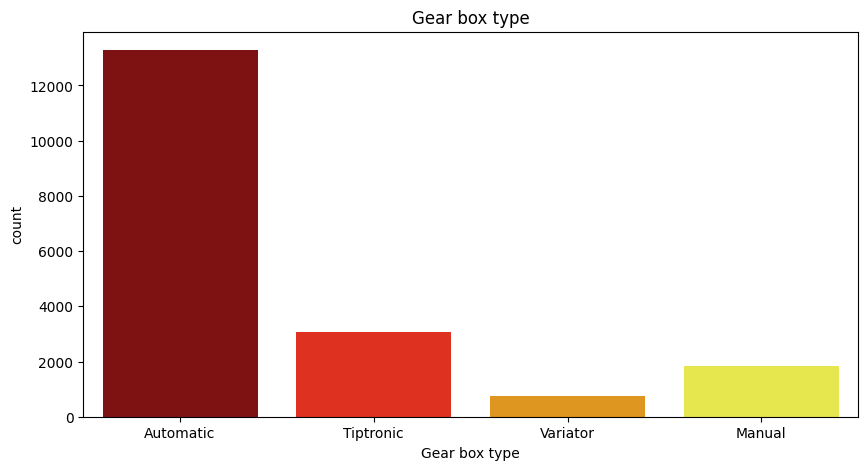

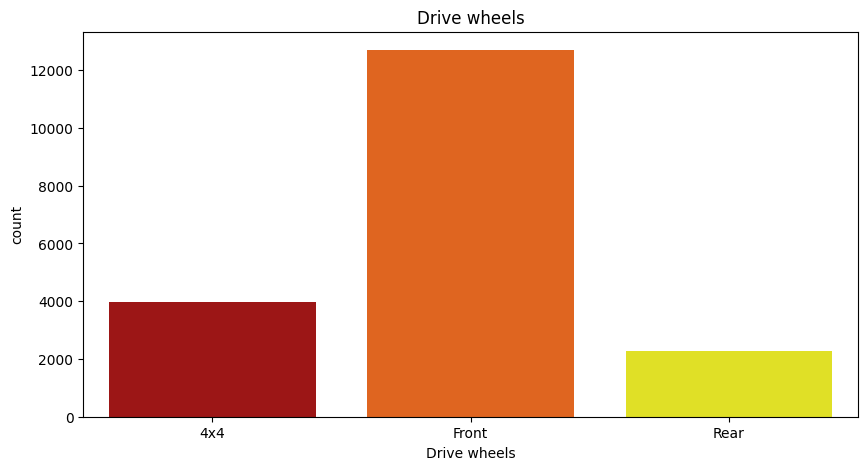

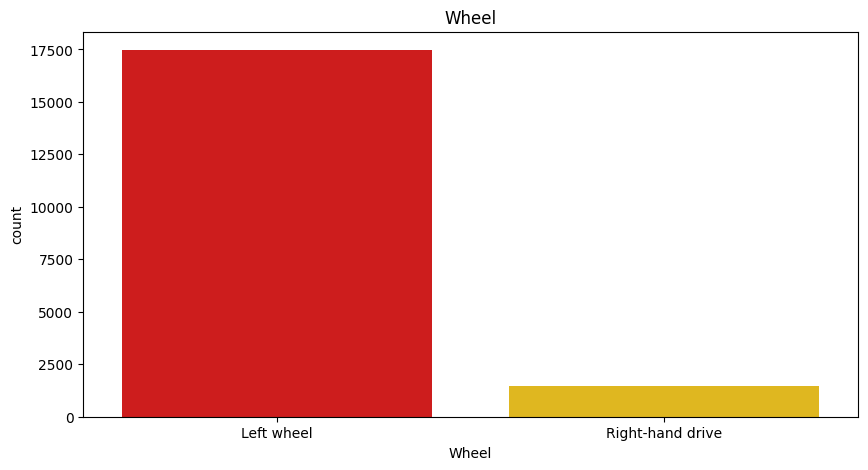

In [122]:
columns =['Leather interior','Fuel type','Gear box type','Drive wheels','Wheel']
for col in columns:
    plt.figure(figsize=(10,5))
    #top10 = data[col].value_counts()[:10]
    sns.countplot(data=data,x=col,palette='hot')
    plt.title(col)
    plt.show()

In [123]:
top_10_cars = data.Manufacturer.value_counts().sort_values(ascending=False)[:10]
top_10_cars

HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: Manufacturer, dtype: int64

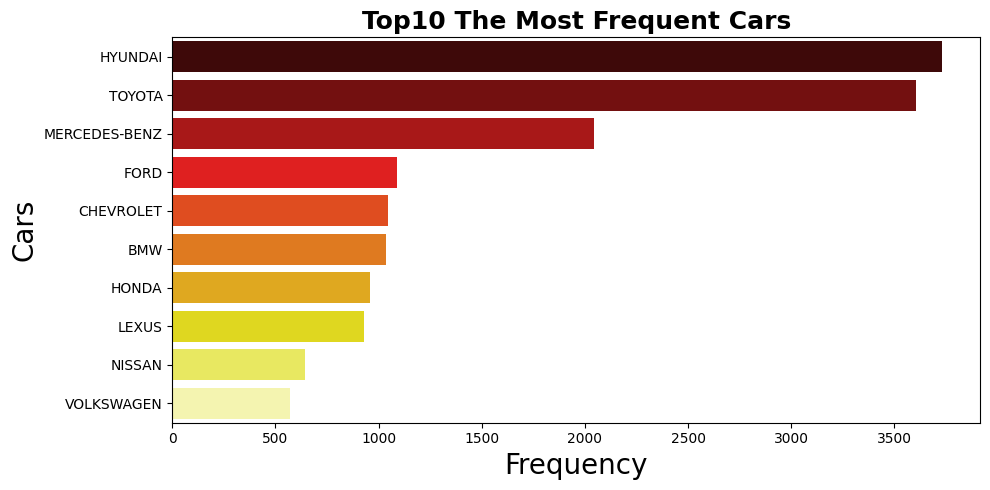

In [124]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_cars, y=top_10_cars.index,palette='hot',linewidth = 4)
plt.title('Top10 The Most Frequent Cars',loc='center',fontweight='bold',fontsize=18)
plt.xlabel('Frequency',fontsize=20)
plt.ylabel('Cars',fontsize=20)
plt.tight_layout()
plt.show()

In [125]:
# Calculate average price for top 10 cars
top_10_cars_means_prices = [data[data['Manufacturer']==i]['Price'].mean() for i in list(top_10_cars.index)]

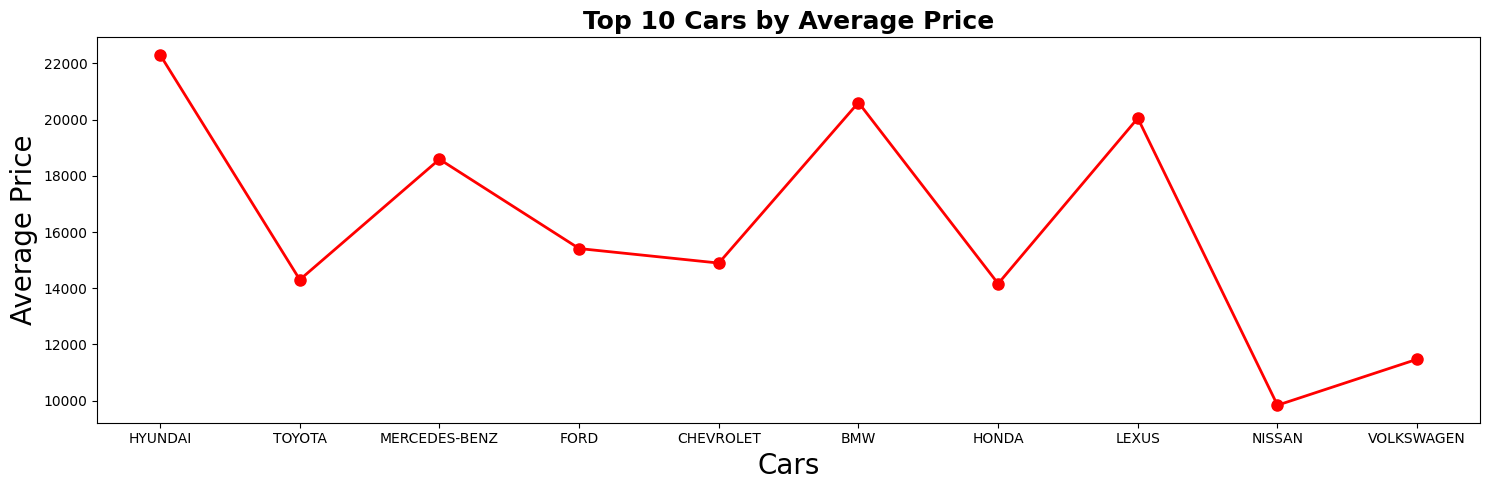

In [126]:
plt.figure(figsize=(15,5))
plt.plot(top_10_cars.index,top_10_cars_means_prices,color='r',
         linewidth = 2,marker='o',markersize = 8)
plt.title('Top 10 Cars by Average Price',loc='center',fontweight='bold',fontsize=18)
plt.ylabel('Average Price',fontsize=20)
plt.xlabel('Cars',fontsize=20)
plt.tight_layout()
plt.show()

In [127]:
# Correlation Analysis
cor= data.select_dtypes(exclude=object).corr()
cor

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age
Price,1.000000,-0.003558,0.008888,-0.001763,0.007435,-0.012709,-0.012689
Levy,-0.003558,1.000000,0.378117,-0.021203,0.251632,0.125015,-0.362827
Engine volume,0.008888,0.378117,1.000000,-0.006292,0.777228,0.221991,0.032427
Mileage,-0.001763,-0.021203,-0.006292,1.000000,-0.001720,-0.009174,0.064058
Cylinders,0.007435,0.251632,0.777228,-0.001720,1.000000,0.174112,0.099443
Airbags,-0.012709,0.125015,0.221991,-0.009174,0.174112,1.000000,-0.235160
Age,-0.012689,-0.362827,0.032427,0.064058,0.099443,-0.235160,1.000000


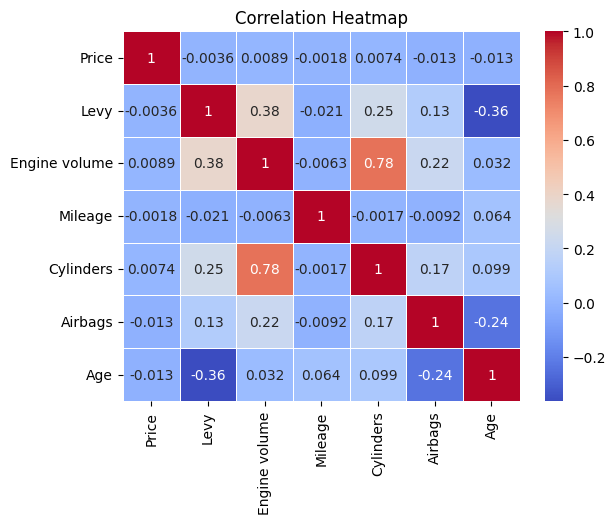

In [128]:
sns.heatmap(cor, annot= True, linewidths= 0.5,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [129]:
numeric_data = data.select_dtypes(exclude=object)

for col in numeric_data:
    q1 = data[col].quantile(0.75)
    q3 = data[col].quantile(0.25)
    iq = q1 - q3

    low = q3-1.5*iq
    high = q1-1.5*iq
    outlier = ((numeric_data[col]>high) | (numeric_data[col]<low)).sum()

    total = numeric_data[col].shape[0]
    # print(f"Total Outliers in {col} are :{outlier}---{round(100*(outlier)/total,2)}%")
if outlier>0:
    data = data.loc[(data[col]<=high) & (data[col]>=low) ]

In [130]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
object_columns = data.select_dtypes(include='object').columns

for col in object_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [131]:
data

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
15,549.0,1079.0,30,23,3,1,3,2.0,74146,4.0,0,1,0,14,12,6
36,51746.0,1077.0,30,24,3,0,3,2.0,10200,4.0,2,1,0,11,12,5
56,87112.0,0.0,19,80,3,1,3,2.0,5323,4.0,2,0,0,7,0,5
59,23521.0,781.0,4,53,7,0,3,1.4,22000,4.0,0,1,0,11,6,6
81,7527.0,830.0,30,180,7,1,3,1.5,27656,4.0,0,1,0,14,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19155,24000.0,2266.0,9,75,5,0,1,1.5,19000,4.0,0,1,1,7,0,6
19157,3607.0,1077.0,13,20,7,1,3,2.0,23474,4.0,0,1,0,2,12,5
19180,63886.0,1076.0,10,149,7,1,2,2.0,5305,4.0,0,1,0,12,4,4
19182,9722.0,609.0,30,30,7,1,1,2.5,127515,4.0,0,1,0,1,12,6


# Training Model

In [132]:
x= data.drop('Price',axis=1)
y= data['Price']

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=5)


In [134]:
algorithm = ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor']
# R2=[]
# RMSE = []
R2_train = []
R2_test = []
RMSE_train = []
RMSE_test = []

In [135]:
# def models(model):
#     model.fit(x_train,y_train)
#     pre = model.predict(x_test)
#     r2 = r2_score(y_test,pre)
#     rmse = np.sqrt(mean_squared_error(y_test,pre))
#     R2.append(r2)
#     RMSE.append(rmse)
#     score = model.score(x_test,y_test)
#     print(f'The Score of Model :{score}')
def models(model):
    model.fit(x_train, y_train)

    # Dự đoán trên tập huấn luyện và tập kiểm tra
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Tính R2 và RMSE trên tập huấn luyện
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

    # Tính R2 và RMSE trên tập kiểm tra
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Lưu giữ kết quả
    R2_train.append(r2_train)
    R2_test.append(r2_test)
    RMSE_train.append(rmse_train)
    RMSE_test.append(rmse_test)

    # In ra kết quả
    print(f'The R2 Score on Training Set of {type(model).__name__}: {r2_train}')
    print(f'The R2 Score on Test Set of {type(model).__name__}: {r2_test}')
    print(f'The RMSE on Training Set of {type(model).__name__}: {rmse_train}')
    print(f'The RMSE on Test Set of {type(model).__name__}: {rmse_test}')
    print('-------------------------')

In [136]:

model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()
model4 = GradientBoostingRegressor()



In [137]:
models(model1)
models(model2)
models(model3)
models(model4)


The R2 Score on Training Set of LinearRegression: 0.44642613144302856
The R2 Score on Test Set of LinearRegression: 0.4816273739553735
The RMSE on Training Set of LinearRegression: 40879.19925228692
The RMSE on Test Set of LinearRegression: 25718.064559540453
-------------------------
The R2 Score on Training Set of DecisionTreeRegressor: 0.9997790366814058
The R2 Score on Test Set of DecisionTreeRegressor: -1.056806553609892
The RMSE on Training Set of DecisionTreeRegressor: 816.7228034922995
The RMSE on Test Set of DecisionTreeRegressor: 51228.77560929721
-------------------------
The R2 Score on Training Set of RandomForestRegressor: 0.9018674165092573
The R2 Score on Test Set of RandomForestRegressor: 0.6349986844704053
The RMSE on Training Set of RandomForestRegressor: 17211.598471017904
The RMSE on Test Set of RandomForestRegressor: 21580.647317165694
-------------------------
The R2 Score on Training Set of GradientBoostingRegressor: 0.9523884992722611
The R2 Score on Test Set o

## Detect Overfit

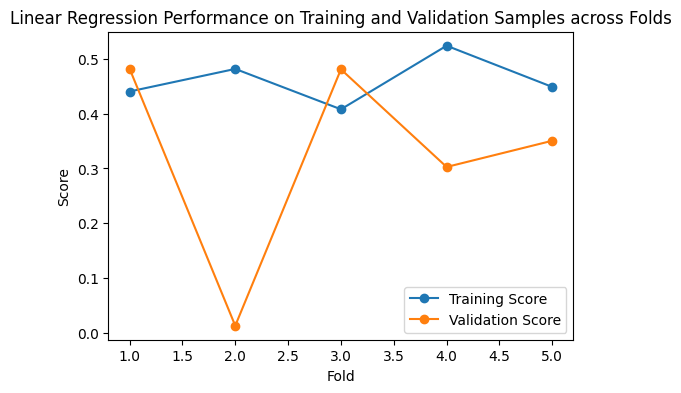

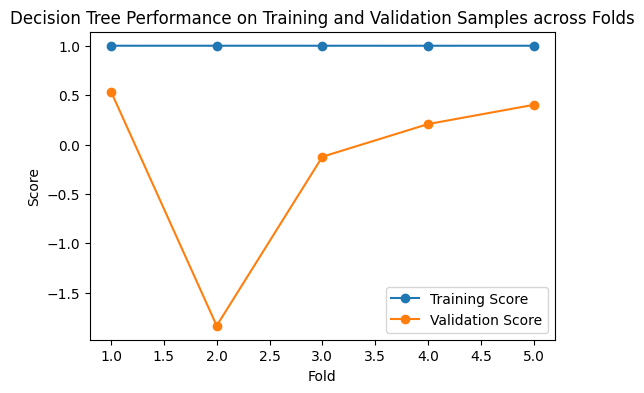

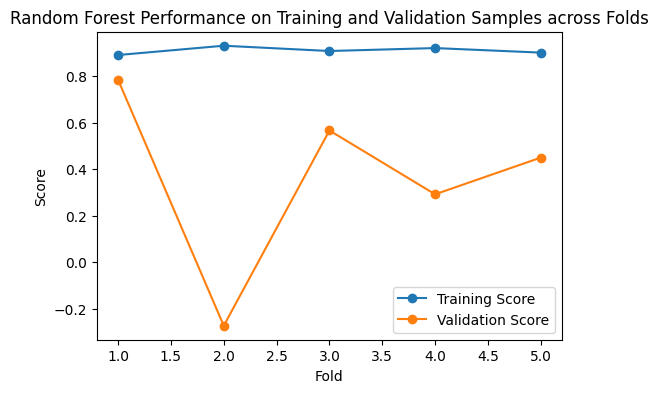

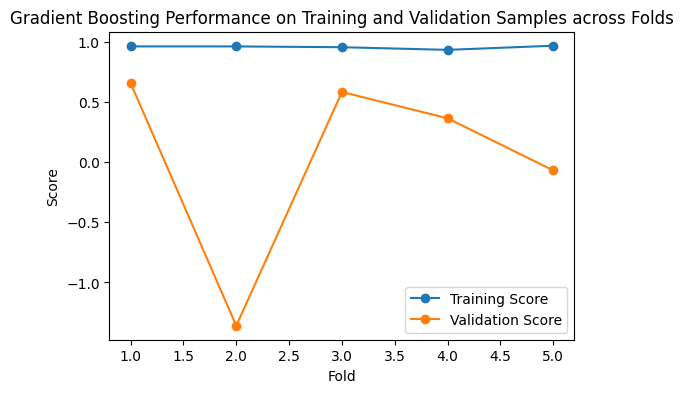

In [138]:
from sklearn.model_selection import StratifiedKFold
model_names = [
    'Linear Regression',
    'Decision Tree',
    'Random Forest',
    'Gradient Boosting',
]

models = [model1, model2, model3, model4]

kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for i, model in enumerate(models):
    model_train_scores = []
    model_val_scores = []

    for fold, (train_index, val_index) in enumerate(kfold.split(x_train, y_train), 1):
        x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(x_train_fold, y_train_fold)

        y_train_pred = model.predict(x_train_fold)
        train_score = model.score(x_train_fold, y_train_fold)
        model_train_scores.append(train_score)

        y_val_pred = model.predict(x_val_fold)
        val_score = model.score(x_val_fold, y_val_fold)
        model_val_scores.append(val_score)

    plt.figure(figsize=(6, 4))
    plt.plot(range(1, 6), model_train_scores, marker='o', label='Training Score')
    plt.plot(range(1, 6), model_val_scores, marker='o', label='Validation Score')
    plt.xlabel('Fold')
    plt.ylabel('Score')
    plt.title(f'{model_names[i]} Performance on Training and Validation Samples across Folds')
    plt.legend()
    plt.show()

## Prevent Overfit

In [139]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import numpy as np

# Assuming X_train_overfit, y_train_overfit, and x_test are defined

model_names = [
    'Linear Regression',
    'Decision Tree',
    'Random Forest',
    'Gradient Boosting',
]

models = [model1, model2, model3, model4]  # Replace with your models
X_train_overfit = np.array(x_train)
y_train_overfit = np.array(y_train)

best_rmse = float('inf')

kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for i, model in enumerate(models):
    best_val_rmse = float('inf')
    best_model = None
    early_stopping_rounds = 5
    no_improvement_count = 0

    for fold, (train_index, val_index) in enumerate(kfold.split(X_train_overfit, y_train_overfit), 1):
        X_train_fold, X_val_fold = X_train_overfit[train_index], X_train_overfit[val_index]
        y_train_fold, y_val_fold = y_train_overfit[train_index], y_train_overfit[val_index]

        current_model = model  # Select the current model

        for epoch in range(100):
            current_model.fit(X_train_fold, y_train_fold)

            y_val_pred = current_model.predict(X_val_fold)
            val_rmse = mean_squared_error(y_val_fold, y_val_pred, squared=False)  # Calculate RMSE
            print(f"Fold {fold} - Epoch {epoch + 1} - Validation RMSE: {val_rmse:.4f}")

            if val_rmse < best_val_rmse:  # Track the best validation RMSE
                best_val_rmse = val_rmse
                best_model = current_model
                no_improvement_count = 0
            else:
                no_improvement_count += 1

            if no_improvement_count >= early_stopping_rounds:
                print(f"Early stopping at epoch {epoch + 1}")
                break

    # Use the best model found on validation data to predict on test data
    y_test_pred = best_model.predict(x_test)

    # Evaluate the model's performance on test data using RMSE
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Test RMSE for {model_names[i]}: {test_rmse:.4f}")
    print(f"Test R2 Score for {model_names[i]}: {test_r2:.4f}")


Fold 1 - Epoch 1 - Validation RMSE: 23307.6196
Fold 1 - Epoch 2 - Validation RMSE: 23307.6196
Fold 1 - Epoch 3 - Validation RMSE: 23307.6196
Fold 1 - Epoch 4 - Validation RMSE: 23307.6196
Fold 1 - Epoch 5 - Validation RMSE: 23307.6196
Fold 1 - Epoch 6 - Validation RMSE: 23307.6196
Early stopping at epoch 6
Fold 2 - Epoch 1 - Validation RMSE: 38407.4004
Early stopping at epoch 1
Fold 3 - Epoch 1 - Validation RMSE: 45781.1298
Early stopping at epoch 1
Fold 4 - Epoch 1 - Validation RMSE: 68858.2601
Early stopping at epoch 1
Fold 5 - Epoch 1 - Validation RMSE: 33113.9961
Early stopping at epoch 1
Test RMSE for Linear Regression: 26780.6836
Test R2 Score for Linear Regression: 0.4379
Fold 1 - Epoch 1 - Validation RMSE: 20482.5955
Fold 1 - Epoch 2 - Validation RMSE: 20627.8927
Fold 1 - Epoch 3 - Validation RMSE: 19917.0558
Fold 1 - Epoch 4 - Validation RMSE: 20675.5566
Fold 1 - Epoch 5 - Validation RMSE: 19485.8993
Fold 1 - Epoch 6 - Validation RMSE: 21038.5800
Fold 1 - Epoch 7 - Validation 

In [140]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_test = np.array(x_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)


## FFNN

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


model_ffnn = Sequential([
    Dense(64, activation='relu', input_shape=(15,1)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1,activation = 'linear')  # Output layer for regression
])

model_ffnn.compile(optimizer='adam', loss='mean_squared_error')
model_ffnn.fit(x_train, y_train, epochs=100, batch_size=32)

y_pred = model_ffnn.predict(x_test)
y_pred_aggregated = np.mean(y_pred, axis=1)  # Aggregate predictions across the time steps

# Calculate R^2 score and RMSE
r2_score_value = r2_score(y_test, y_pred_aggregated)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_aggregated))
print("R2 Score:", r2_score_value)
print("RMSE:", rmse)


Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 4329938432.0000
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 4329902080.0000
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 4329842176.0000
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 4329747968.0000
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 4329584640.0000
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 4329339904.0000
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 4328988160.0000
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 4328494592.0000
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 4327833088.0000
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 4326978560.0000
Epoch 11/100
20/20 [==============================] - 0s 3ms/step - loss: 4325931520.0000
Epoch 12/100
20/20 

## Preventing model FFNN

In [142]:
from keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

model_ffnn_prevent = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.001), input_shape=(15,1)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1,activation = 'linear')
])


model_ffnn_prevent.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_ffnn_prevent.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])

y_pred = model_ffnn_prevent.predict(x_test)
y_pred_aggregated = np.mean(y_pred, axis=1)  # Aggregate predictions across the time steps

# Calculate R^2 score and RMSE
r2_score_value = r2_score(y_test, y_pred_aggregated)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_aggregated))
print("R2 Score:", r2_score_value)
print("RMSE:", rmse)



Epoch 1/100
20/20 [==============================] - 2s 23ms/step - loss: 4329938944.0000 - val_loss: 2325034752.0000
Epoch 2/100
20/20 [==============================] - 0s 8ms/step - loss: 4329888768.0000 - val_loss: 2324977408.0000
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 4329801216.0000 - val_loss: 2324880384.0000
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 4329658368.0000 - val_loss: 2324715264.0000
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 4329422336.0000 - val_loss: 2324456192.0000
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 4329050112.0000 - val_loss: 2324066560.0000
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 4328531968.0000 - val_loss: 2323493888.0000
Epoch 8/100
20/20 [==============================] - 0s 6ms/step - loss: 4327763968.0000 - val_loss: 2322729984.0000
Epoch 9/100
20/20 [==============================] - 0s 5ms/ste

## RNN

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming x_train, y_train, x_test, and y_test are already prepared with the correct shapes

model_rnn = Sequential([
    LSTM(128, input_shape=(15, 1), return_sequences=True),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile your model before training
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Train your model (assuming you have x_train and y_train)
model_rnn.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

# Predict using the trained model
y_pred = model_rnn.predict(x_test)
y_pred_aggregated = np.mean(y_pred, axis=1)  # Aggregate predictions across the time steps

# Calculate R^2 score and RMSE
r2_score_value = r2_score(y_test, y_pred_aggregated)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_aggregated))
print("R2 Score:", r2_score_value)
print("RMSE:", rmse)

Epoch 1/100
20/20 [==============================] - 4s 53ms/step - loss: 4329926144.0000 - val_loss: 2324930816.0000
Epoch 2/100
20/20 [==============================] - 0s 24ms/step - loss: 4329005056.0000 - val_loss: 2322915072.0000
Epoch 3/100
20/20 [==============================] - 1s 25ms/step - loss: 4325258752.0000 - val_loss: 2317908736.0000
Epoch 4/100
20/20 [==============================] - 0s 24ms/step - loss: 4317540352.0000 - val_loss: 2308111360.0000
Epoch 5/100
20/20 [==============================] - 0s 25ms/step - loss: 4302755328.0000 - val_loss: 2290814208.0000
Epoch 6/100
20/20 [==============================] - 0s 24ms/step - loss: 4277667328.0000 - val_loss: 2262206976.0000
Epoch 7/100
20/20 [==============================] - 0s 25ms/step - loss: 4239862528.0000 - val_loss: 2221418752.0000
Epoch 8/100
20/20 [==============================] - 0s 24ms/step - loss: 4186332928.0000 - val_loss: 2166056704.0000
Epoch 9/100
20/20 [==============================] - 1s 

## Preventing model RNN

In [144]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import numpy as np

# Assuming x_train, y_train, x_test, and y_test are already prepared with the correct shapes

model_rnn_prevent = Sequential([
    LSTM(128, input_shape=(15,1), return_sequences=True, kernel_regularizer=regularizers.l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),  # Adding dropout after the first dense layer
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),  # Adding dropout after the second dense layer
    Dense(1, activation='linear')
])



model_rnn_prevent.compile(optimizer='Adam', loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_rnn_prevent.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])

y_pred = model_rnn_prevent.predict(x_test)
y_pred_aggregated = np.mean(y_pred, axis=1)  # Aggregate predictions across the time steps

# Calculate R^2 score and RMSE
r2_score_value = r2_score(y_test, y_pred_aggregated)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_aggregated))
print("R2 Score:", r2_score_value)
print("RMSE:", rmse)


Epoch 1/200
20/20 [==============================] - 4s 55ms/step - loss: 4329912320.0000 - val_loss: 2324903168.0000
Epoch 2/200
20/20 [==============================] - 1s 25ms/step - loss: 4328937472.0000 - val_loss: 2322953472.0000
Epoch 3/200
20/20 [==============================] - 1s 27ms/step - loss: 4325201408.0000 - val_loss: 2318123520.0000
Epoch 4/200
20/20 [==============================] - 1s 25ms/step - loss: 4317946880.0000 - val_loss: 2309633536.0000
Epoch 5/200
20/20 [==============================] - 1s 26ms/step - loss: 4305907712.0000 - val_loss: 2295903488.0000
Epoch 6/200
20/20 [==============================] - 1s 41ms/step - loss: 4286834688.0000 - val_loss: 2275052032.0000
Epoch 7/200
20/20 [==============================] - 1s 45ms/step - loss: 4258874624.0000 - val_loss: 2245220096.0000
Epoch 8/200
20/20 [==============================] - 1s 48ms/step - loss: 4218303232.0000 - val_loss: 2202098688.0000
Epoch 9/200
20/20 [==============================] - 1s 

# GridSearch

In [145]:
from sklearn.model_selection import GridSearchCV


# Khởi tạo mô hình Random Forest
model = model3

# Danh sách các tham số cần tinh chỉnh
param_grid = {
    'n_estimators': [100, 200, 300], # Số lượng cây trong forest
    'max_depth': [None, 5, 10, 15],  # Chiều sâu tối đa của mỗi cây
    'min_samples_split': [2, 5, 10], # Số lượng mẫu tối thiểu để chia nút
    'min_samples_leaf': [1, 2, 4]    # Số lượng mẫu tối thiểu trong lá
}

# Tạo GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

# Fit GridSearch trên dữ liệu huấn luyện
grid_search.fit(x_train, y_train)

# In ra các tham số tốt nhất
print("Best Parameters:", grid_search.best_params_)

# # In ra R2 score trên tập kiểm tra của mô hình tốt nhất



Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [146]:
best_model_rf = grid_search.best_estimator_

# Đánh giá mô hình trước khi tinh chỉnh
print("Before GridSearch:")
y_pred_before = model3.predict(x_test)
r2_before = r2_score(y_test, y_pred_before)
rmse_before = np.sqrt(mean_squared_error(y_test, y_pred_before))
print("R2 Score before GridSearch:", r2_before)
print("RMSE before GridSearch:", rmse_before)

# Đánh giá mô hình sau khi tinh chỉnh
print("\nAfter GridSearch:")
y_pred_after = best_model_rf.predict(x_test)
r2_after = r2_score(y_test, y_pred_after)
rmse_after = np.sqrt(mean_squared_error(y_test, y_pred_after))
print("R2 Score after GridSearch:", r2_after)
print("RMSE after GridSearch:", rmse_after)


Before GridSearch:
R2 Score before GridSearch: -0.04170680577750163
RMSE before GridSearch: 36457.762159991995

After GridSearch:
R2 Score after GridSearch: 0.6201134702349667
RMSE after GridSearch: 22016.293379194107


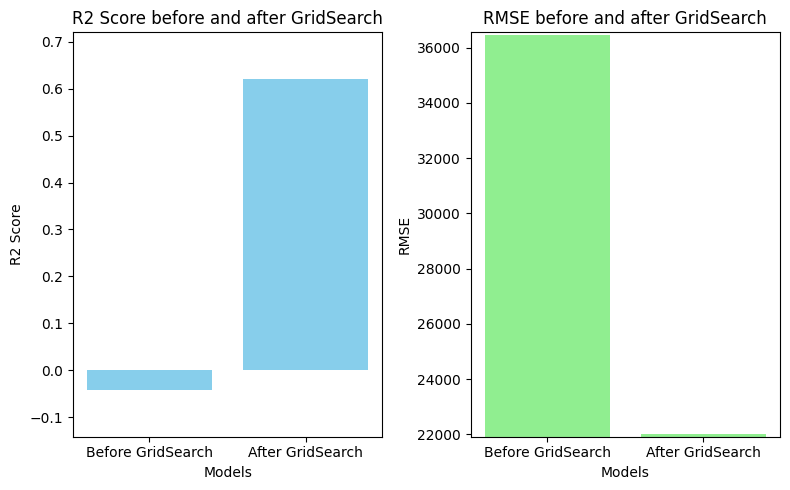

In [147]:
import matplotlib.pyplot as plt

# Tạo các danh sách chứa thông số đánh giá
r2_scores = [r2_before, r2_after]
rmse_scores = [rmse_before, rmse_after]
labels = ['Before GridSearch', 'After GridSearch']

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.bar(labels, r2_scores, color='skyblue')
plt.ylim(min(r2_scores) - 0.1, max(r2_scores) + 0.1)
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Score before and after GridSearch')

plt.subplot(1, 2, 2)
plt.bar(labels, rmse_scores, color='lightgreen')
plt.ylim(min(rmse_scores) - 100, max(rmse_scores) + 100)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE before and after GridSearch')

plt.tight_layout()
plt.show()
